In [93]:
#import necesary libraries

from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
from natsort import natsorted

polynomial
1.406e-08 x - 5.742e-06 x + 0.000622 x - 0.002353 x - 0.05202

In [94]:
# def generate_function():
#     def function(x):
#         return 1.406*(10**-8)*x**4 + -5.742*(10**-6)*x**3 + 0.000622*x**2 + -0.002353*x + -0.05202
#     return function


def generate_function():
    def function(x):
        return -1.234*(10**-15)*x**8 + 9.092*(10**-13)*x**7 - 2.726*(10**-10)*x**6 + 4.249*(10**-8)*x**5 - 3.621*(10**-6)*x**4 + 0.0001586*x**3 - 0.002737*x**2 + 0.01614*x - 0.0116
    return function

In [95]:
model = tf.keras.Sequential([
    # tf.keras.layers.Dense(1, input_shape=(1,), activation="relu"),
    # tf.keras.layers.Dense(1, input_shape=(1,), activation="sigmoid")

    # deeper network
    # tf.keras.layers.Dense(128, input_shape=(1,), activation="relu"),
    # tf.keras.layers.Dense(64, activation="relu"),
    # tf.keras.layers.Dense(1, activation="sigmoid")

    # custom activator func
    tf.keras.layers.Dense(64, input_shape=(1,), activation="tanh"),
    tf.keras.layers.Dense(32, activation="elu"),
    tf.keras.layers.Dense(32, activation="elu"),
    tf.keras.layers.Dense(1, activation="sigmoid")

    # deeper network
    # tf.keras.layers.Dense(256, input_shape=(1,), activation="relu"),
    # tf.keras.layers.Dense(128, activation="relu"),
    # tf.keras.layers.Dense(1, activation="sigmoid")

    # polynomial
    # tf.keras.layers.Lambda(lambda x: tf.pow(x, 4)),  # Fourth-degree polynomial
    # tf.keras.layers.Dense(1)
])

checkpoint = ModelCheckpoint(filepath='w/weights_{epoch:02d}.keras')

In [96]:
function = generate_function()

#gen training data
x = np.random.uniform(1, 180, size=(1000, 1))
y = function(x)
y = (y-y.min())/(y.max()-y.min())

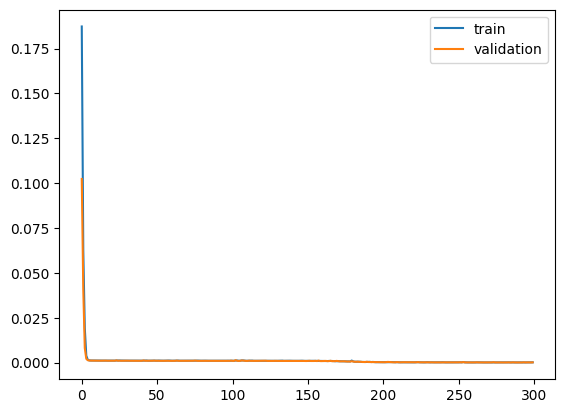

In [97]:
# train compile
model.compile(optimizer='adam', loss='mse')
history = model.fit(
    x,
    y,
    batch_size=32,
    epochs=300,
    validation_split=0.2,
    verbose=0,
    callbacks=[checkpoint]
)

plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="validation")
plt.legend()

In [98]:
#load weights file
for i, weights_file in enumerate(natsorted(glob.glob("w/*.keras"))):
    model.load_weights(weights_file)
    x_values = np.linspace(0, 180, 1000)

    y_values = model.predict(x_values)

    plt.xlabel('Angle')
    plt.ylabel('Lift Coefficient')

    plt.plot(x_values, y_values, label="predicted", color="green")

    y_true = function(x_values)
    y_true = (y_true - y_true.min()) / (y_true.max() - y_true.min())
    plt.plot(x_values, y_true, label="true", color="blue")

    plt.legend()
    plt.savefig(f"img/learning_function_{i}.png")
    plt.close()



32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 848us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step
32/32 ━━━━━━━━━━━━━━━━━━━

img/learning_function_0.png
img/learning_function_1.png
img/learning_function_2.png
img/learning_function_3.png
img/learning_function_4.png
img/learning_function_5.png
img/learning_function_6.png
img/learning_function_7.png
img/learning_function_8.png
img/learning_function_9.png
img/learning_function_10.png
img/learning_function_11.png
img/learning_function_12.png
img/learning_function_13.png
img/learning_function_14.png
img/learning_function_15.png
img/learning_function_16.png
img/learning_function_17.png
img/learning_function_18.png
img/learning_function_19.png
img/learning_function_20.png
img/learning_function_21.png
img/learning_function_22.png
img/learning_function_23.png
img/learning_function_24.png
img/learning_function_25.png
img/learning_function_26.png
img/learning_function_27.png
img/learning_function_28.png


/tmp/ipykernel_19272/3833200695.py:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


img/learning_function_29.png
img/learning_function_30.png
img/learning_function_31.png
img/learning_function_32.png
img/learning_function_33.png
img/learning_function_34.png
img/learning_function_35.png
img/learning_function_36.png
img/learning_function_37.png
img/learning_function_38.png
img/learning_function_39.png
img/learning_function_40.png
img/learning_function_41.png
img/learning_function_42.png
img/learning_function_43.png
img/learning_function_44.png
img/learning_function_45.png
img/learning_function_46.png
img/learning_function_47.png
img/learning_function_48.png
img/learning_function_49.png
img/learning_function_50.png
img/learning_function_51.png
img/learning_function_52.png
img/learning_function_53.png
img/learning_function_54.png
img/learning_function_55.png
img/learning_function_56.png
img/learning_function_57.png
img/learning_function_58.png
img/learning_function_59.png
img/learning_function_60.png
img/learning_function_61.png
img/learning_function_62.png
img/learning_f

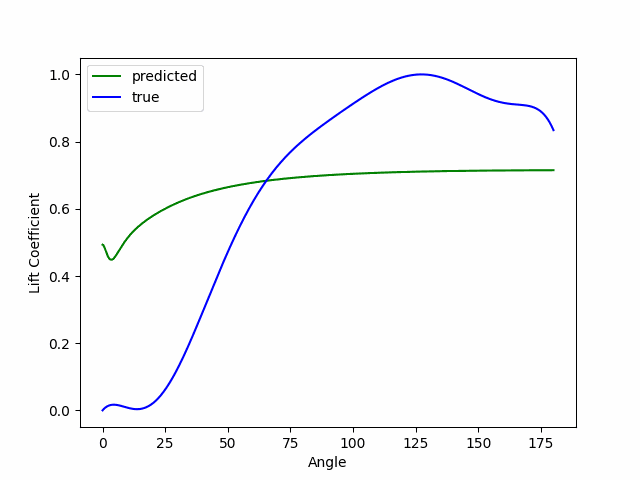

In [99]:
# create gif
import imageio
import os
images = []
for filename in natsorted(glob.glob("img/learning_function_*.png")):
    print(filename)
    images.append(imageio.imread(filename))
    os.remove(filename)
imageio.mimsave('gif/learning_function.gif', images)

from IPython.display import Image
Image('gif/learning_function.gif')
